## Exercise 4.1

Generate (fake) data that is linearly related to log(x).

You are making this model up. It is of the form B0 + B1*log(x) + epsilon. (You are making up the parameters.)

Simulate some data from this model.

Then fit two models to it:

quadratic (second degree polynomial)
logarithmic (log(x))
(The second one should fit really well, since it has the same form as the underlying model!)

In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
import statsmodels.formula.api as smf
import random
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [3]:
b0 = 1
b1 = .5

n = 1000

x = np.random.uniform(1, 5, 1000)


In [4]:
ylist = []
for num in x:
    ylist.append(b0 + b1*np.log(num)+np.random.uniform(0,1))
    

In [5]:
y = pd.Series(ylist)
y_array = np.array(y)

In [6]:
data = pd.DataFrame({'y': y_array, 'x':x})

In [7]:
data.head()

,x,y
0,2.150762,2.293208
1,3.243425,1.971698
2,3.080835,2.187918
3,1.206419,1.671608
4,1.975818,1.355090


In [8]:
data['x2'] = np.square(data['x'])
data['xlog'] = np.log(data['x'])

In [9]:
X1 = data[['x','x2']]
X2 = data[['x','xlog']]

In [10]:
data.isnull().values.any()

False

In [11]:
data.describe()

,x,y,x2,xlog
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.996471,2.012685,10.313847,1.011841
std,1.156005,0.370726,7.114992,0.431841
min,1.000796,1.028081,1.001593,0.000796
25%,2.012963,1.738822,4.052020,0.699607
50%,2.967279,2.010055,8.804748,1.087645
75%,4.007657,2.301369,16.061318,1.388207
max,4.997504,2.792440,24.975050,1.608939


In [12]:
model = smf.OLS(data['y'], X1)
fit1 = model.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 1.834e+04
Date:                Fri, 28 Oct 2016   Prob (F-statistic):               0.00
Time:                        23:12:15   Log-Likelihood:                -319.42
No. Observations:                1000   AIC:                             642.8
Df Residuals:                     998   BIC:                             652.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x              1.2145      0.013     90.796      0.000         1.188     1.241
x2            -0.1599      0.003    -46.631      0.000        -0.167    -0.153
==============================================================================
Omnibus:                       53.862   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.276
Skew:                           0.027   Prob(JB):                     2.40e-05
Kurtosis:                       2.287   Cond. No.                         16.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
model1 = smf.OLS(data['y'], X2)
fit2 = model1.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     5728.
Date:                Fri, 28 Oct 2016   Prob (F-statistic):               0.00
Time:                        23:12:15   Log-Likelihood:                -873.03
No. Observations:                1000   AIC:                             1750.
Df Residuals:                     998   BIC:                             1760.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x              1.0969      0.069     15.939      0.000         0.962     1.232
xlog          -1.4269      0.201     -7.102      0.000        -1.821    -1.033
==============================================================================
Omnibus:                       51.896   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.685
Skew:                          -0.466   Prob(JB):                     7.29e-11
Kurtosis:                       2.497   Cond. No.                         39.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---

### Exercise 4.2

Generate (fake) data from a model of the form B0 + B1*x + B2*x^2 + epsilon. (You are making up the parameters.)

Split the data into a training and test set.

Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.

(You could use sklearn.metrics.mean_squared_error.)

In [14]:
b2 = 3
ylist2 = []
count = 0
for num in x:
    ylist2.append(b0 + b1*num+b2**2+np.random.uniform(0,1))
    
y2 = b0 + b1*x+(b2*x**2)+random.randint(0,1)


In [15]:
data2 = pd.DataFrame({'y': y2, 'x':x})

In [16]:
X = data2['x']
y = data2['y']

In [17]:

X.describe()

count    1000.000000
mean        2.996471
std         1.156005
min         1.000796
25%         2.012963
50%         2.967279
75%         4.007657
max         4.997504
Name: x, dtype: float64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)


In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800,)
(200,)
(800,)
(200,)


In [20]:
lr3 = make_pipeline(PolynomialFeatures(2), LinearRegression())
model3 = lr3.fit(X_train.reshape(-1,1), y_train)
model3.score(X_test.reshape(-1,1), y_test)

/Users/williamsanders/anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


1.0

In [21]:
X_train.reshape(-1,1).shape

(800, 1)

In [22]:
y_pred_train = lr3.predict(X_train.reshape(-1,1))
y_pred_test = lr3.predict(X_test.reshape(-1,1))

In [23]:
# y_pred_train

In [24]:
mean_squared_error(y_train, y_pred_train)

1.8302066039193237e-28

In [25]:
mean_squared_error(y_test, y_pred_test)

1.768981136912858e-28

---

### Exercise 4.3

For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

training error
test error
R squared

In [26]:
data2.head()

,x,y
0,2.150762,16.952718
1,3.243425,35.181139
2,3.080835,32.015047
3,1.206419,6.969548
4,1.975818,14.699484


In [27]:
test_error = []
train_error = []
rsquared= []
lr = LinearRegression()

for i in xrange(8):
#     polynomial = np.power(x,i)
    polynomial = make_pipeline(PolynomialFeatures(i), LinearRegression())
    X_train, X_test, y_train, y_test = train_test_split(data2['x'],data['y'], test_size = 0.2)
    X_train = X_train.reshape(-1,1)
    X_test = X_test.reshape(-1,1)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_train)
    train_error.append(mean_squared_error(y_train, y_pred))
    y_test_pred = lr.predict(X_test)
    test_error.append(mean_squared_error(y_test, y_test_pred))
    
    rsquared.append(lr.score(X_test, y_test))

    

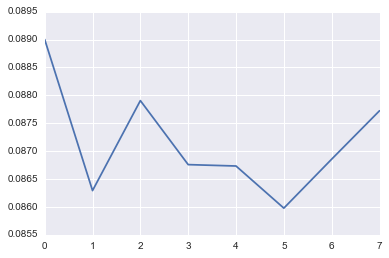

In [28]:
poly = range(0,8)
plt.plot(poly, train_error)


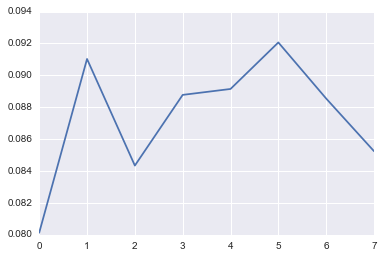

In [29]:
plt.plot(poly, test_error)

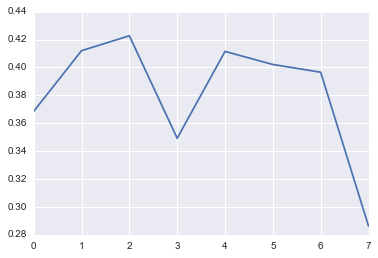

In [30]:
plt.plot(poly, rsquared)

---

### Exercise 4.4

For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.

In [31]:
X = pd.concat([data2.x, data2.y])

In [32]:
X = data2.x
y = data2.y
train_error = []
test_error = []

In [33]:
train_error = []
test_error = []
X = np.square(x)

for number in range(5,1000,5):
    X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size= 0.30)
    X_train = X_train.reshape(-1,1)
    X_test = X_test.reshape(-1,1)
    
    X_train = X_train[:number,:]
    y_train = y_train[:number]
    
    lr.fit(X_train, y_train)
    
    y_train_pred = lr.predict(X_train)
    train_error.append(mean_squared_error(y_train, y_train_pred))
    
    y_test_pred = lr.predict(X_test)
    test_error.append(mean_squared_error(y_test, y_test_pred))


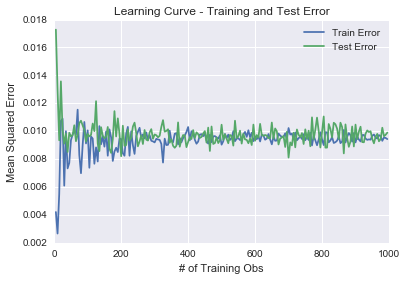

In [34]:
plt.plot(range(5,1000,5), train_error)
plt.plot(range(5,1000,5), test_error)
plt.legend(['Train Error', 'Test Error'])
plt.xlabel('# of Training Obs')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve - Training and Test Error');

---